# test

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB
None 

       population     profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000 



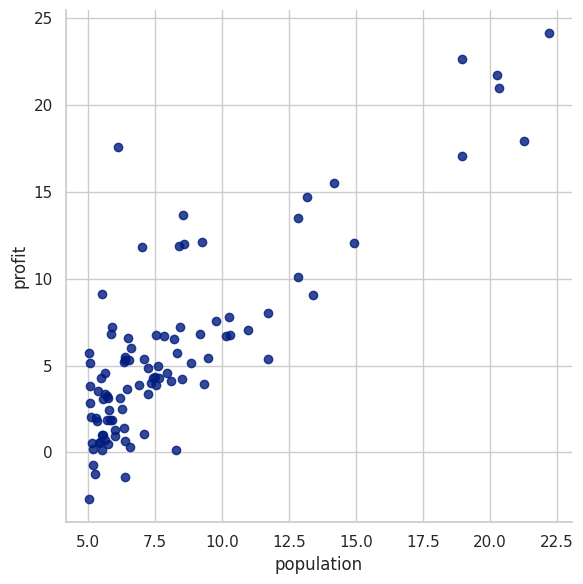

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>
[0. 0.]
[-3.89530051  1.19298539]


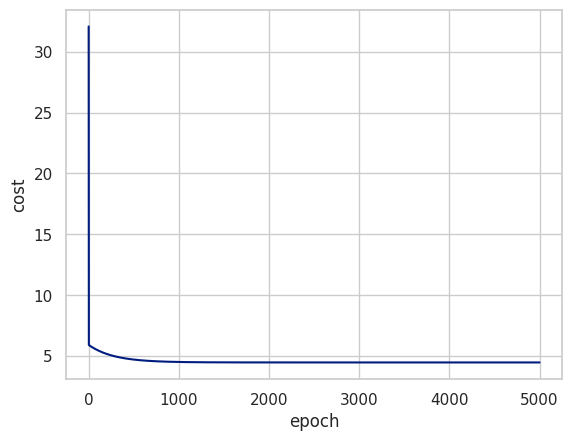

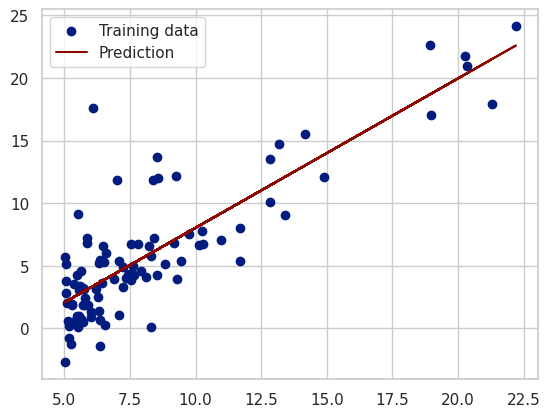

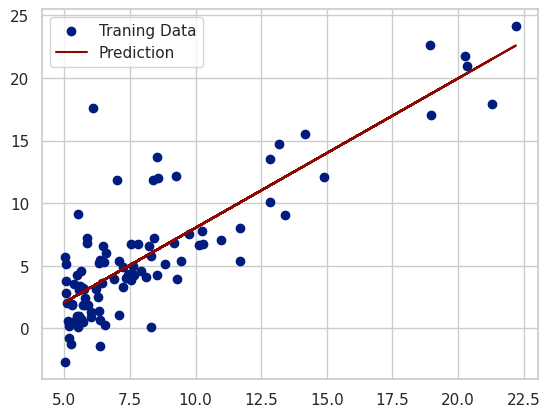

head of raw data:
    square  bedrooms  prices
0    2104         3  399900
1    1600         3  329900
2    2400         3  369000
3    1416         2  232000
4    3000         4  539900

head of data after normalizetion:
      square  bedrooms    prices
0  0.130010 -0.223675  0.475747
1 -0.504190 -0.223675 -0.084074
2  0.502476 -0.223675  0.228626
3 -0.735723 -1.537767 -0.867025
4  1.257476  1.090417  1.595389

data scale:
 (47, 3) <class 'numpy.ndarray'>

data label:
 (47,) <class 'numpy.ndarray'>


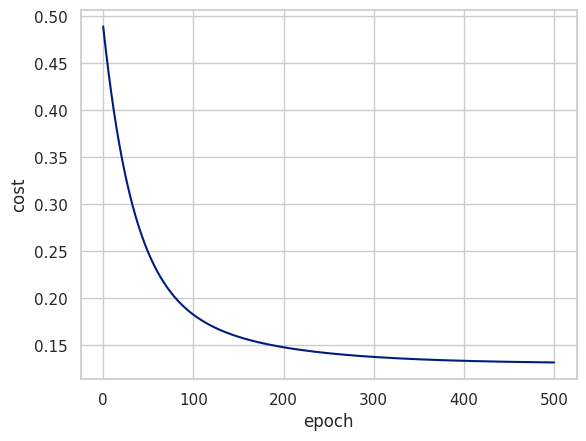


final_theta is:  [-1.16679716e-16  8.30383883e-01  8.23982853e-04]


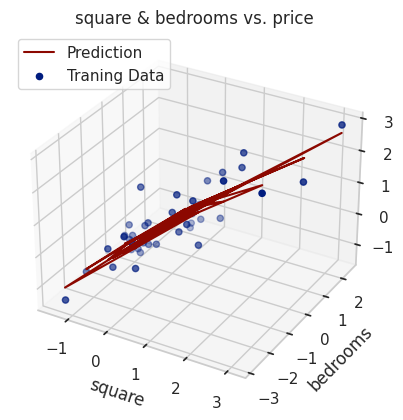


candidate is :  [1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


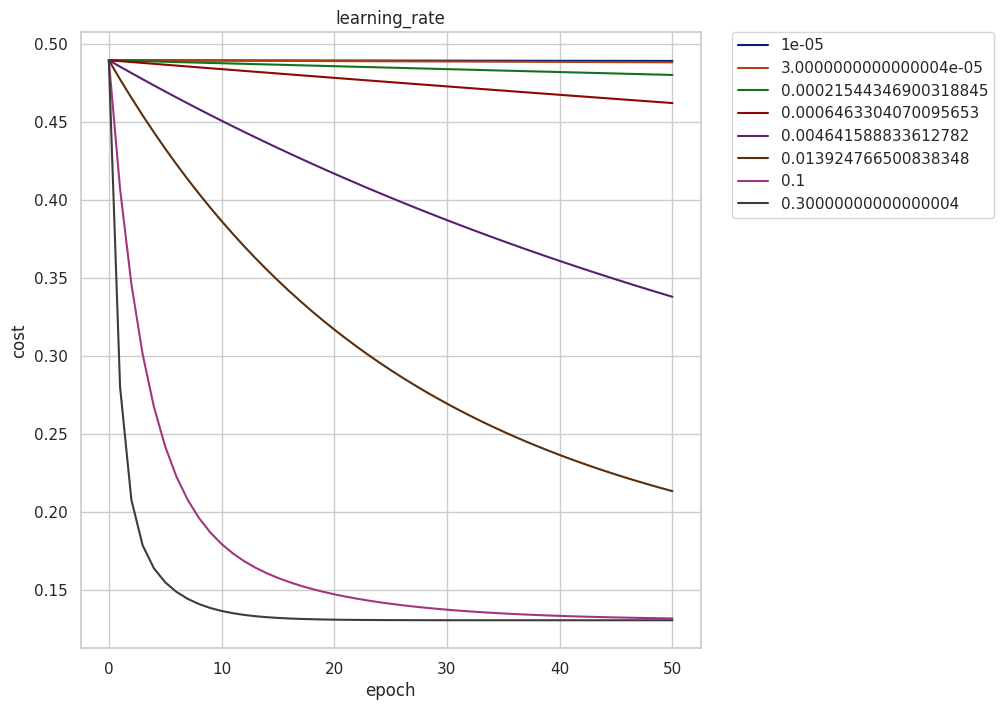


final_theta2, which calculated by nomalEqn is : [-1.11022302e-16  8.84765988e-01 -5.31788197e-02]


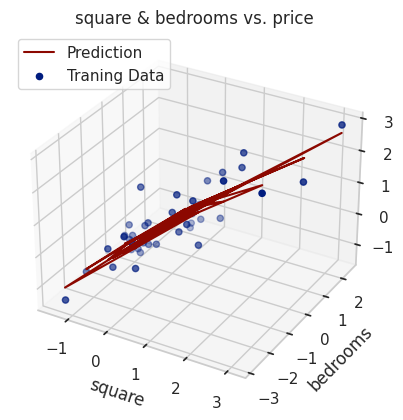

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt

df = pd.read_csv("ex1data1.txt", names=["population", "profit"])
print(df.head(),"\n")
print(df.info(),"\n")
describe_info = df.describe()
print(describe_info, "\n")

sns.lmplot(x="population", y="profit", data=df, height=6, fit_reg=False)
plt.show()

def get_X(df): #读取特征
    ones = pd.DataFrame({"ones" : np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_y(df): #读取标签
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean())/column.std())

data = df
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

theta = np.zeros(X.shape[1])
print(theta)

def lr_loss(theta, X, y):
# 代价函数
    m = X.shape[0] # m是样本数
    inner = X @ theta - y
    square_sum = inner.T @ inner
    cost = square_sum / ( m * 2)
    
    return cost

lr_loss(theta, X, y)

def gradient(theta, X, y):
    m = X.shape[0]

    inner = X.T @ (X @ theta - y)
    return inner / m

def batch_gradient_decent(theta, X, y, epoch, alpha=0.01):
    cost_data = [lr_loss(theta, X, y)]
    _theta = theta.copy()

    for _ in range(epoch):
        _theta = _theta - alpha * gradient(_theta, X, y)
        cost_data.append(lr_loss(_theta, X, y))
    return _theta, cost_data

epoch = 5000

final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch)

print(final_theta)
#print("\n", cost_data)

lr_loss(final_theta, X, y)

#ax = sns.lineplot(cost_data, time=np.range(epoch + 1))
#ax.set_xlabel("epoch")
#ax.set_ylabel("cost")
plt.plot(range(epoch+1), cost_data)
plt.xlabel("epoch")
plt.ylabel("cost")

plt.show()

b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, 'r', label="Prediction")
plt.legend(loc=2)
plt.show()

# 通过sklearn库来实现该方案，并绘图
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

x = X[:, 1]
f = model.predict(X).flatten()

plt.scatter(X[:,1], y, label='Traning Data')
plt.plot(x, f, 'r', label='Prediction')
plt.legend(loc=2)
plt.show()





# 章节二
raw_data = pd.read_csv("ex1data2.txt", names=["square", "bedrooms", "prices"])
print("head of raw data:\n", raw_data.head())

def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean())/column.std())

data = normalize_feature(raw_data)
print("\nhead of data after normalizetion:\n", data.head())

X = get_X(data)
print("\ndata scale:\n", X.shape, type(X))

y = get_y(data)
print("\ndata label:\n", y.shape, type(y))

alpha = 0.01 #学习率
theta = np.zeros(X.shape[1])
epoch = 500

final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

plt.plot(range(epoch + 1), cost_data)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

print("\nfinal_theta is: ", final_theta)

# sklearn 的预测：
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X, y)

f = model.predict(X).flatten()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
#ax.view_init(30, 10)
plt.show()

# 学习率
base = np.logspace(-1, -5, num=4)
candidate = np.sort(np.concatenate((base, base * 3)))
print("\ncandidate is : ", candidate)

epoch = 50
fig, ax = plt.subplots(figsize=(8, 8))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(range(epoch + 1), cost_data, label=alpha)

ax.set_xlabel("epoch", fontsize=12)
ax.set_ylabel("cost", fontsize=12)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title("learning_rate", fontsize=12)
plt.show()
# 我们能发现最合适的learning rate 是0.3


# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

final_theta2 = normalEqn(X, y)
print("\nfinal_theta2, which calculated by nomalEqn is :", final_theta2)

f = final_theta2[0] + final_theta2[1] * X[:, 1] + final_theta2[2] * X[:, 2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(X[:,1], X[:,2], f, 'r', label='Prediction')
ax.scatter(X[:,1], X[:,2], y, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('square')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('square & bedrooms vs. price')
#ax.view_init(30, 10)
plt.show()

# 4. 正规方程 - Normal equation
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型